# Assignment-07-Clustering-Q2-(Crime)


## Hierarchical Clustering 

## Using Normalize Function 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
# Normalize heterogenous numerical data using norm function
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


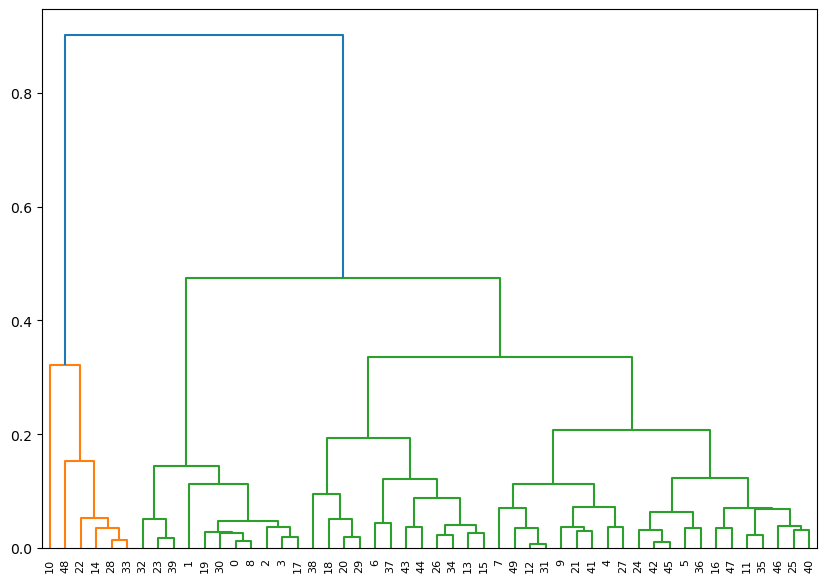

In [6]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime2_norm,'complete'))

In [7]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [8]:
y=pd.DataFrame(hclusters.fit_predict(crime2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    20
3    12
1    12
2     5
4     1
Name: clustersid, dtype: int64

In [9]:
# Adding clusters to dataset
crime2['clustersid']=hclusters.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [10]:
crime2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.760000,255.550000,66.100000,27.090000
1,1,4.758333,116.583333,70.083333,15.683333
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.783333,141.583333,61.833333,21.466667
4,4,5.300000,46.000000,83.000000,20.200000


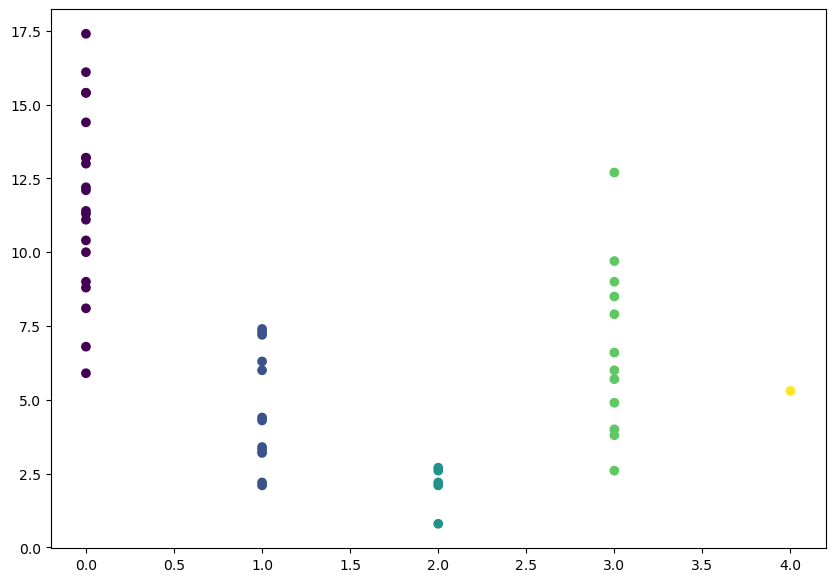

In [11]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clustersid'],crime2['Murder'], c=hclusters.labels_) 

## K-Means Clustering 

In [12]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
# EastWestAirlines dataset is already imported

In [14]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [15]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [16]:
# Normalize heterogenous numerical data by using Standard Scaler
crime2_norm=StandardScaler().fit_transform(crime2)

In [17]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-clusster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [18]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime2_norm)
    wcss.append(kmeans.inertia_)

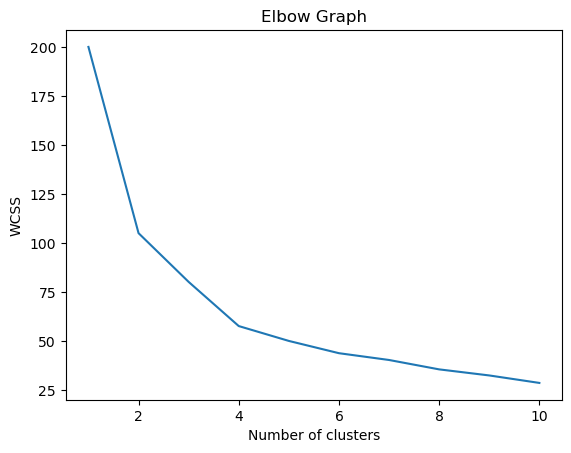

In [19]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build Cluster Algorithm using K=3 

In [20]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=30).fit(crime2_norm)
clusters3

KMeans(n_clusters=3, random_state=30)

In [21]:
clusters3.labels_

array([2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 0])

In [22]:
# Assign clusters to the data set
crime3=crime2.copy()
crime3['clusters3id']=clusters3.labels_
crime3

,Murder,Assault,UrbanPop,Rape,clusters3id
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [23]:
# Compute the centroids for K=4 clusters with 11 variables
clusters3.cluster_centers_

array([[-0.41081687, -0.32571014,  0.4740874 , -0.20357044],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144]])

In [24]:
# Group data by Clusters (K=4)
crime3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.016667,143.888889,72.333333,19.344444
1,1,3.600000,78.538462,52.076923,12.176923
2,2,12.331579,259.315789,68.315789,29.215789


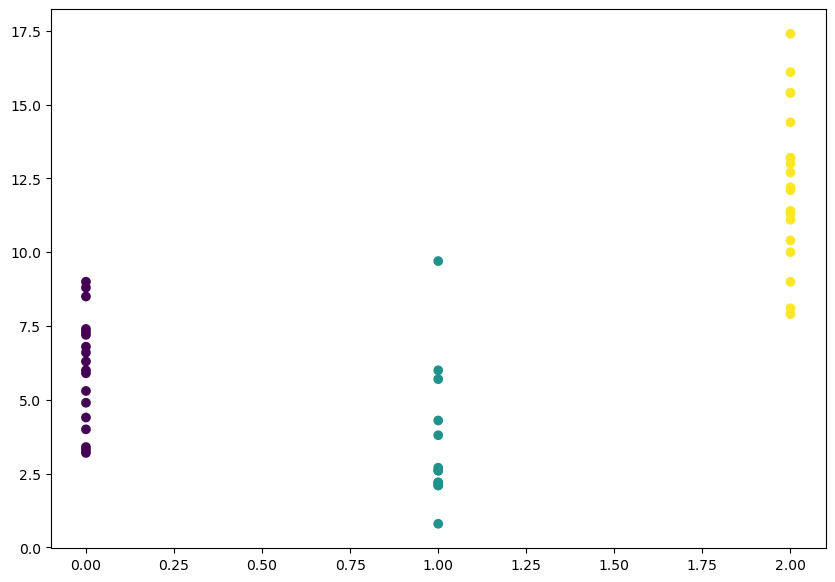

In [25]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['clusters3id'],crime3['Murder'], c=clusters3.labels_) 

## Build Cluster Algorithm Using K=5 

In [26]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(crime2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [27]:
clusters5.labels_

array([0, 3, 3, 2, 3, 3, 1, 2, 3, 0, 1, 4, 3, 2, 4, 2, 2, 0, 4, 3, 1, 3,
       4, 0, 2, 4, 2, 3, 4, 1, 3, 3, 0, 4, 1, 2, 2, 1, 1, 0, 4, 0, 3, 1,
       4, 2, 1, 4, 4, 2])

In [28]:
# Assign clusters to the data set
crime5=crime2.copy()
crime5['clusters5id']=clusters5.labels_
crime5

,Murder,Assault,UrbanPop,Rape,clusters5id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [29]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [-0.16799819, -0.22739373, -0.1645708 , -0.12404563],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.11467476, -1.17725513, -1.00201665, -1.05938813]])

In [30]:
# Group data by Clusters (K=5)
crime5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.671429,251.285714,54.285714,21.685714
1,1,4.955556,125.444444,80.111111,17.788889
2,2,7.063636,152.000000,63.181818,20.081818
3,3,10.966667,264.000000,76.500000,33.608333
4,4,2.981818,73.636364,51.181818,11.409091


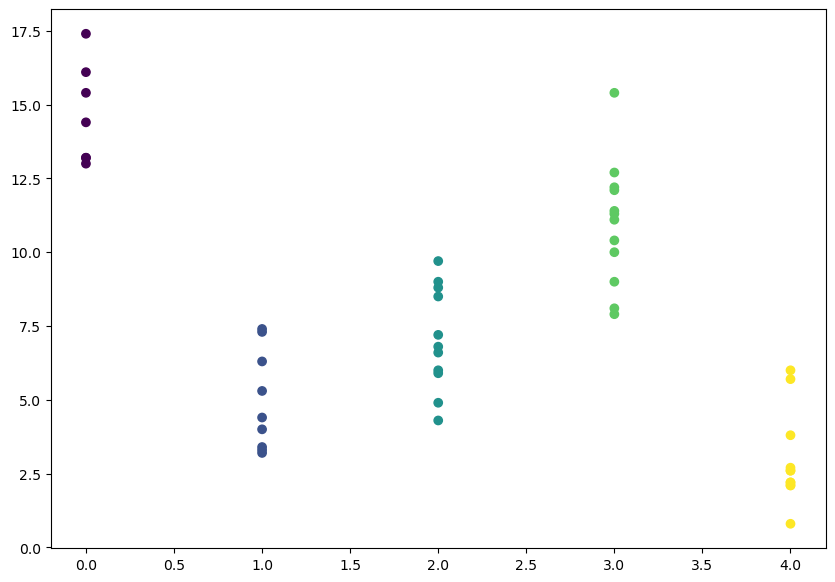

In [31]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime5['clusters5id'],crime5['Murder'], c=clusters5.labels_) 

## DBSCAN Clustering 

In [32]:
# Import Libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [33]:
# EastWestAirlines dataset is already imported

In [34]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [35]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [36]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [37]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [38]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [39]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [40]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


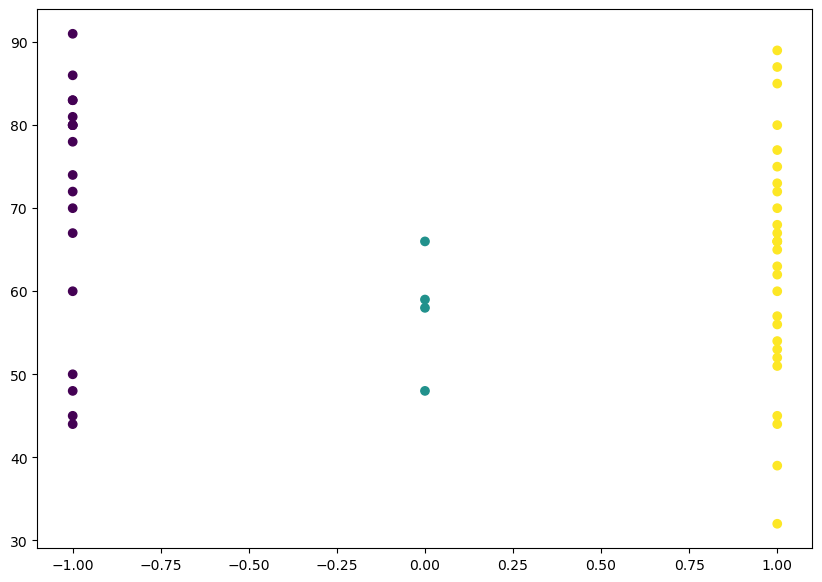

In [41]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 